# QBAF-Py: Examples
This noteboook provides some examples for how to use QBAF-Py.

## Instantiating QBAFs
Let us first instantiate a QBAF.

In [9]:
from qbaf import QBAFramework, QBAFARelations
from qbaf_visualizer.Visualizer import visualize

args = ['a', 'b', 'c', 'd', 'e', 'f']
initial_strengths = [0.5, 0.2, 0.85, 0.65, 0.4, 1]
atts = [('c', 'a'), ('e', 'b'), ('f', 'c')]
supps = [('b', 'a'), ('d', 'a'), ('e', 'c')]
qbaf_0 = QBAFramework(args, initial_strengths, atts, supps, semantics="QuadraticEnergy_model")


The semantics that will later be applied is tied to the QBAF instantiation.
Here, we specify the quadratic energy semantics.

## Drawing Inferences
As we have instantiated our QBAF with a specific semantics, the inferences (final strengths) are readily available:

In [10]:
final_strengths = qbaf_0.final_strengths
print(final_strengths)

{'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.625, 'b': 0.1724137931034483, 'a': 0.5187551724162596}


We update the visualizations to also show the final strengths of the arguments.
For this, we call our visualization function, with the parameter `with_fs` set to `True`.

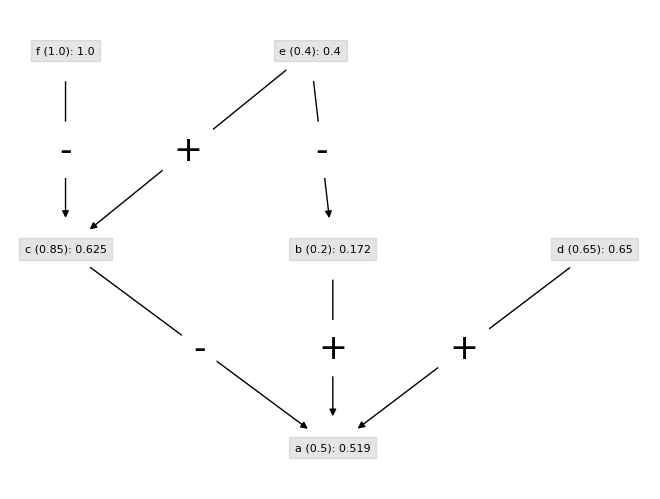

In [11]:
visualize(qbaf_0, with_fs=True, round_to=3)

## Generating Explanations
Given two argumentation frameworks and two arguments therein (so-called *topic arguments*), we can explain changes in the relative strength of these arguments (see: Kampik and Čyras. [Explaining Change in Quantitative Bipolar Argumentation](https://www.diva-portal.org/smash/get/diva2:1690830/FULLTEXT02). First, we instantiate two QBAFs and compute their final strengths; note that here, we use a naive semantics (`basic_model`), which simply subtracts the final strengths of attackers and adds the final strength of supporters.

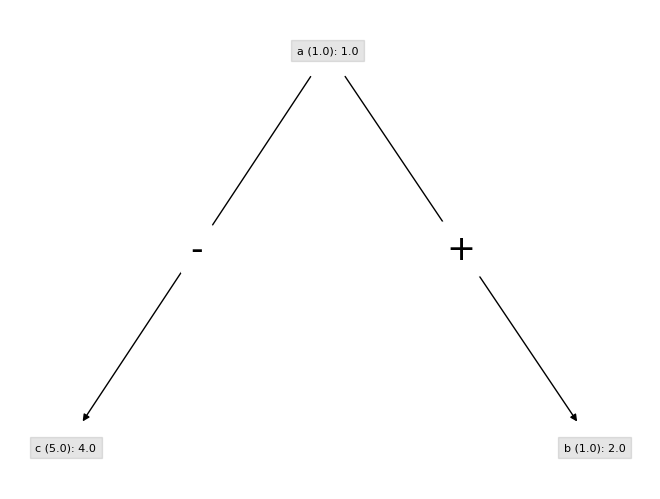

In [12]:
args_1 = ['a', 'b', 'c']
initial_strengths_1 = [1, 1, 5]
atts_1 = [('a', 'c')]
supps_1 = [('a', 'b')]
qbaf_1 = QBAFramework(args_1, initial_strengths_1, atts_1, supps_1, semantics="basic_model")

args_2 = ['a', 'b', 'c', 'd', 'e']
initial_strengths_2 = [2, 1, 5, 1, 3]
atts_2 = [('a', 'c'), ('d', 'a'), ('e', 'c')]
supps_2 = [('a', 'b'), ('d', 'e')]
qbaf_2 = QBAFramework(args_2, initial_strengths_2, atts_2, supps_2, semantics="basic_model")

visualize(qbaf_1, with_fs=True)

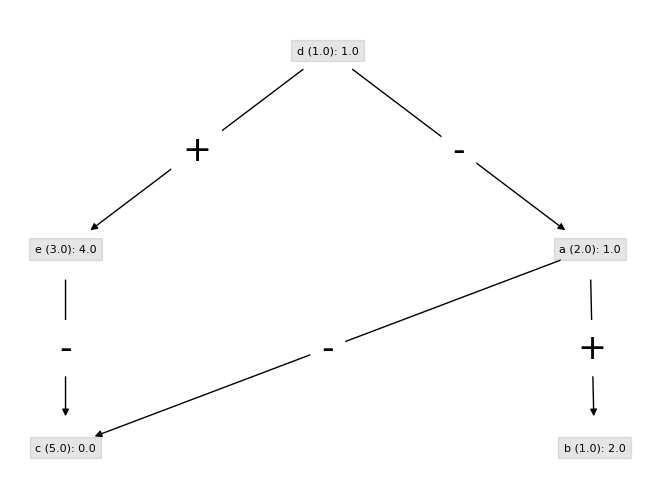

In [13]:
visualize(qbaf_2, with_fs=True)

As we can see, `b` is strength-inconsistent w.r.t. `c` (and `qbaf_1`, `qbaf_2`):

In [14]:
print(f'Are a and b strenght-consistent? {qbaf_1.are_strength_consistent(qbaf_2, "b", "c")}')

Are a and b strenght-consistent? False


Now, we can determine and visualize strength inconsistency explanations.

Minimal sufficient explanations: [{'a'}, {'e'}]


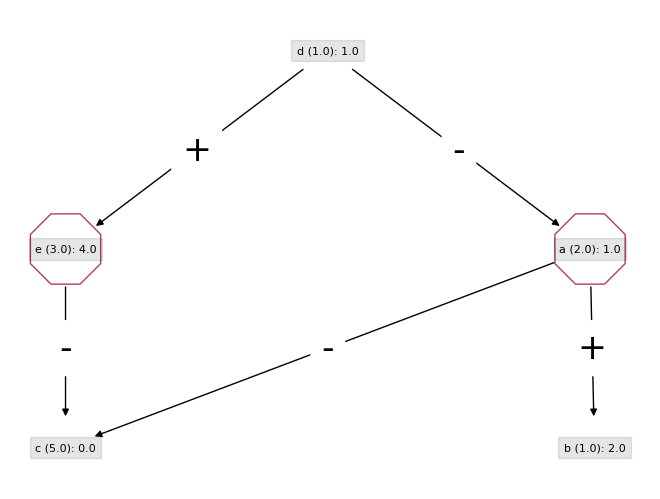

In [15]:
min_sufficient_explanations = qbaf_1.minimalSSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal sufficient explanations: {min_sufficient_explanations}')
visualize(qbaf_2, explanations=min_sufficient_explanations, with_fs=True)

Minimal counterfactual explanations: [{'e'}]


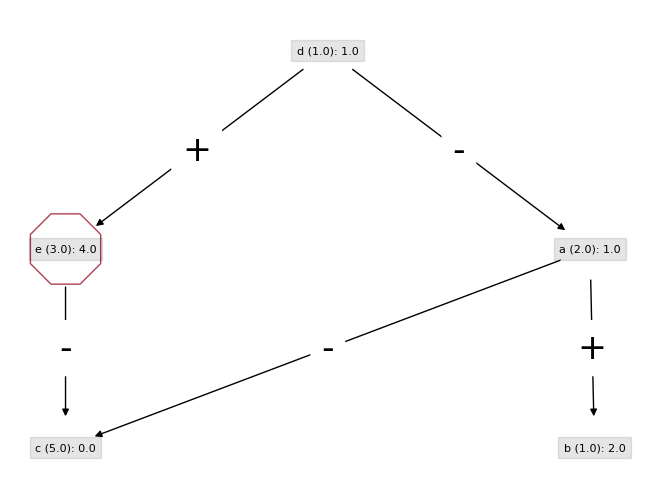

In [16]:
min_counterfactual_explanations = qbaf_1.minimalCSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal counterfactual explanations: {min_counterfactual_explanations}')
visualize(qbaf_2, explanations=min_counterfactual_explanations, with_fs=True)

Minimal necessary explanations: [{'a', 'e'}]


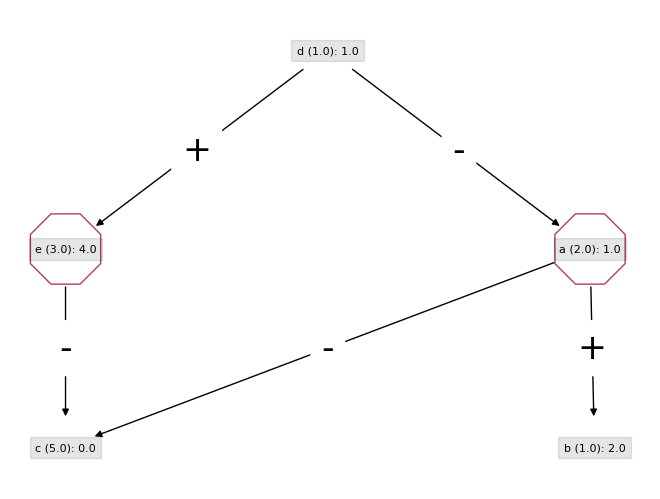

In [17]:
min_necessary_explanations = qbaf_1.minimalNSIExplanations(qbaf_2, 'b', 'c')
print(f'Minimal necessary explanations: {min_necessary_explanations}')
visualize(qbaf_2, explanations=min_necessary_explanations, with_fs=True)

## QBAF Arguments
Let us introduce the class QBAFArgument.

Note: Any object that is hashable can be used as argument (string, int, ...).

In [18]:
from qbaf import QBAFArgument

a = QBAFArgument(name='a', description='Shares from company X should be bought')
print(f"{a}")
print(f"{a = }")
print(f'{a.name = }')
print(f'{a.description = }')

Arg('a')
a = 'a'
a.name = 'a'
a.description = 'Shares from company X should be bought'


The attribute name is unmodifiable, whereas the attribute description is optional and modifiable.

In [19]:
b = QBAFArgument('b')
print(f'{b.name = }')

b.description = 'Shares from company X should be sold'
print(f'{b.description = }')

b.name = 'b'
b.description = 'Shares from company X should be sold'


Two arguments are equal iff their names are equal.

In [20]:
print(f'{a == b = }')

print(f"{a == QBAFArgument('a', 'Different description') = }")

a == b = False
a == QBAFArgument('a', 'Different description') = True


## QBAF semantics
The semantics can be selected only in the initialization of a QBAF.

The semantics is an optional argument that can be consulted with default value 'basic_model'.

In [21]:
args = ['a', 'b', 'c']
istrengths = [1, 1, 5]
att = [('a', 'c')]
supp = [('a', 'b')]
qbf = QBAFramework(args, istrengths, att, supp)

print(f'{qbf.semantics = }')

qbf.semantics = 'basic_model'


There are several semantics to choose from.
Each one with its one implementation of aggregation and influence functions.

In [22]:
for semantics in ["basic_model", "QuadraticEnergy_model", "SquaredDFQuAD_model",
                  "EulerBasedTop_model", "EulerBased_model", "DFQuAD_model"]:
    qbf_0 = QBAFramework(arguments=['a', 'b', 'c', 'd', 'e', 'f'],
                         initial_strengths=[0.5, 0.2, 0.85, 0.65, 0.4, 1],
                         attack_relations=[('c', 'a'), ('e', 'b'), ('f', 'c')],
                         support_relations=[('b', 'a'), ('d', 'a'), ('e', 'c')],
                         semantics=semantics)
    final_strengths = {arg: round(fs, 2) for arg, fs in qbf_0.final_strengths.items()}
    print(f"{semantics}'s final strengths: {final_strengths}")

basic_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.25, 'b': -0.2, 'a': 0.7}
QuadraticEnergy_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.62, 'b': 0.17, 'a': 0.52}
SquaredDFQuAD_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.53, 'b': 0.14, 'a': 0.57}
EulerBasedTop_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.81, 'b': 0.15, 'a': 0.47}
EulerBased_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.81, 'b': 0.15, 'a': 0.5}
DFQuAD_model's final strengths: {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.34, 'b': 0.12, 'a': 0.68}


## QBAF custom semantics
Your own semantics can be used by implementing your own aggregation and influence functions.

Optionally, you can set a max and min value for the initial strengths of your semantics.

In [23]:
qbf_0 = QBAFramework(arguments=['a', 'b', 'c', 'd', 'e', 'f'],
                      initial_strengths=[0.5, 0.2, 0.85, 0.65, 0.4, 1],
                      attack_relations=[('c', 'a'), ('e', 'b'), ('f', 'c')],
                      support_relations=[('b', 'a'), ('d', 'a'), ('e', 'c')],
                      aggregation_function=lambda att_s, supp_s : sum(supp_s) - sum(att_s),
                      influence_function=lambda w, s : w + s,
                      min_strength=-1.7976931348623157e+308,
                      max_strength=1.7976931348623157e+308)
print("Custom implementation of basic_model")
print(f'{qbf_0.semantics = }')
print(f'{qbf_0.min_strength = }')
print(f'{qbf_0.max_strength = }')
print(f'{qbf_0.final_strengths = }')

Custom implementation of basic_model
qbf_0.semantics = None
qbf_0.min_strength = -1.7976931348623157e+308
qbf_0.max_strength = 1.7976931348623157e+308
qbf_0.final_strengths = {'d': 0.65, 'f': 1.0, 'e': 0.4, 'c': 0.25, 'b': -0.2, 'a': 0.7}


## QBAF disjoint relations
Since it does not make much sense to have one argument attacking and supporting at the same time another argument, the property disjoint_relations has been added that is activated when its value is True (default).
If it is activated, it checks that the attack and support relations are disjoint.

In [24]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, att + supp,
                   semantics="basic_model",
                   disjoint_relations=False)
print(f'{qbf.disjoint_relations = }')
print(f'{qbf.attack_relations.isdisjoint(qbf.support_relations) = }')

qbf.disjoint_relations = False
qbf.attack_relations.isdisjoint(qbf.support_relations) = False


In [25]:
# Now if we set the qbf to check if they are disjoint it will throw an Exception if they are not
try:
    qbf.disjoint_relations = True
except ValueError:
      print("Value error: attack_relations and support_relations are not disjoint")

Value error: attack_relations and support_relations are not disjoint


## QBAF Attributes
The QBAF contains arguments, attack relations, support relations and initial strengths.

### Arguments
Arguments can be consulted, added and removed.

Note that arguments that are contained in any attack/relation cannot be removed.
Also, adding arguments that already exist does nothing (it does not modify its initial strength).

In [26]:
args,initial_strengths,att,supp = ['a', 'b', 'c', 'd'], [1, 1, 5, 0], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.arguments = }')
print(f"{'a' in qbf.arguments = }")
print(f"{qbf.contains_argument('a') = }")

qbf.arguments = {'c', 'b', 'a', 'd'}
'a' in qbf.arguments = True
qbf.contains_argument('a') = True


In [27]:
qbf.remove_argument('d')
print("Remove argument 'd'")
print(f'{qbf.arguments = }')

qbf.add_argument('e', initial_strength=0) # initial_strength is optional. Defaults to 0.0
print("Add argument 'e'")
print(f'{qbf.arguments = }')

Remove argument 'd'
qbf.arguments = {'c', 'b', 'a'}
Add argument 'e'
qbf.arguments = {'c', 'b', 'a', 'e'}


### Attack/Support relations
Attack/Support relations can be consulted, added and removed.

They are instances of the class QBAFARelations, which represents a set of tuples of size 2.

In [28]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.attack_relations = }')
print(f'{qbf.support_relations = }')

print(f"{('a', 'c') in qbf.attack_relations = }")
print(f"{qbf.contains_attack_relation('a', 'c') = }")

print(f"{('b', 'a') in qbf.support_relations = }")
print(f"{qbf.contains_support_relation('b', 'a') = }")

qbf.attack_relations = QBAFARelations{('a', 'c')}
qbf.support_relations = QBAFARelations{('a', 'b')}
('a', 'c') in qbf.attack_relations = True
qbf.contains_attack_relation('a', 'c') = True
('b', 'a') in qbf.support_relations = False
qbf.contains_support_relation('b', 'a') = False


In [29]:
qbf.remove_attack_relation('a', 'c')
qbf.remove_support_relation('a', 'b')
print("Removing existing attack and support relations")

qbf.add_attack_relation('c', 'a')
qbf.add_support_relation('b', 'a')
print("Adding new attack and support relations")

print(f'{qbf.attack_relations = }')
print(f'{qbf.support_relations = }')

Removing existing attack and support relations
Adding new attack and support relations
qbf.attack_relations = QBAFARelations{('c', 'a')}
qbf.support_relations = QBAFARelations{('b', 'a')}


### Initial strengths
Initial strengths can be consulted and modified.

In [30]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.initial_strengths = }')
print(f"{qbf.initial_strength('a') = }")

qbf.initial_strengths = {'a': 1.0, 'b': 1.0, 'c': 5.0}
qbf.initial_strength('a') = 1.0


In [31]:
qbf.modify_initial_strength('a', 2)
print("Modify initial_strength of 'a'")

print(f'{qbf.initial_strengths = }')

Modify initial_strength of 'a'
qbf.initial_strengths = {'a': 2.0, 'b': 1.0, 'c': 5.0}


### Final strengths
Final strengths can be consulted and they are calculated making use of the aggregation and influence functions.

Every time the final strengths are calculated, they are stored so they can be used next time until the QBAF is modified.

When the final strengths are calculated, it is checked that the QBAF is acyclic. Otherwise, it throws and Exception.

In [32]:
args,initial_strengths,att,supp = ['a', 'b', 'c'], [1, 1, 5], [('a', 'c')], [('a', 'b')]
qbf = QBAFramework(args,initial_strengths, att, supp)

print(f'{qbf.isacyclic() = }')

print(f'{qbf.final_strengths = }')
print(f"{qbf.final_strength('a') = }")

qbf.isacyclic() = True
qbf.final_strengths = {'a': 1.0, 'c': 4.0, 'b': 2.0}
qbf.final_strength('a') = 1.0


## QBAF Additional functionality
Additional functionality regarding strength consistency, QBAF reversal and strength inconsistency explanations.

Note that when working with more than one QBAF, they are assumed to have the same semantics. It is not checked.

In [33]:
qbfa = QBAFramework(['a', 'b', 'c'], [2, 1, 5], [('a', 'c')], [('a', 'b')],
                   semantics="basic_model")

#qbfe = QBAFramework(['a', 'b', 'c', 'e'], [1, 1, 5, 3], [('a', 'c'), ('e', 'c')], [('a', 'b')])
qbfe = qbfa.copy()
qbfe.modify_initial_strength('a', 1)
qbfe.add_argument('e', 3)
qbfe.add_attack_relation('e', 'c')

print(f"{qbfa.final_strengths = }")
print(f"{qbfe.final_strengths = }")

qbfa.final_strengths = {'a': 2.0, 'c': 3.0, 'b': 3.0}
qbfe.final_strengths = {'a': 1.0, 'e': 3.0, 'c': 1.0, 'b': 2.0}


### Strength Consistency
It can be checked if two arguments are strength consistent w.r.t. two QBAFs.

In [34]:
print(f"{qbfe.are_strength_consistent(qbfa, 'b', 'c') = }")

qbfe.are_strength_consistent(qbfa, 'b', 'c') = False


### Reversal

QBAF Reversal of a set of arguments w.r.t. two QBAFs returns a new QBAF.

In [35]:
reversal = qbfe.reversal(qbfa, {'e'})

print(f"{reversal.final_strengths = }")

reversal.final_strengths = {'a': 1.0, 'c': 4.0, 'b': 2.0}


### Strength Inconsistency Explanation

It can be checked if a set of arguments is a Sufficient, Necessary or Counterfactual Strength Inconsistency Explanation of two arguments w.r.t. two QBAFs.

In [36]:
explanations = {"Sufficient SI Explanation": qbfe.isSSIExplanation(qbfa, {'e'}, 'b', 'c'),
                "Necessary SI Explanation": qbfe.isNSIExplanation(qbfa, {'e'}, 'b', 'c'),
                "Counterfactual SI Explanation": qbfe.isCSIExplanation(qbfa, {'e'}, 'b', 'c')}
for e in explanations:
    if explanations[e]:
        print("{'e'} is a %s of 'a' and 'b' w.r.t. qbfe and qbfa" % e)
    else:
        print("{'e'} is NOT a %s of 'a' and 'b' w.r.t. qbfe and qbfa" % e)

{'e'} is a Sufficient SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa
{'e'} is NOT a Necessary SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa
{'e'} is NOT a Counterfactual SI Explanation of 'a' and 'b' w.r.t. qbfe and qbfa


### $\subset$-minimal SI Explanations
All the $\subset$-minimal Sufficient, Necessary or Counterfactual Strength Inconsistency Explanation set of arguments can be computed w.r.t. two arguments and two QBAFs.

In [37]:
explanations = {"Sufficient SI Explanations": qbfe.minimalSSIExplanations(qbfa, 'b', 'c'),
                "Necessary SI Explanations": qbfe.minimalNSIExplanations(qbfa, 'b', 'c'),
                "Counterfactual SI Explanations": qbfe.minimalCSIExplanations(qbfa, 'b', 'c')}
for e in explanations:
    print("Subset-minimal %s of 'a' and 'b' w.r.t. qbfe and qbfa: %s" % (e, str(explanations[e])))

Subset-minimal Sufficient SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a'}, {'e'}]
Subset-minimal Necessary SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a', 'e'}]
Subset-minimal Counterfactual SI Explanations of 'a' and 'b' w.r.t. qbfe and qbfa: [{'a', 'e'}]


### Robustness measures

Now, we illustrate the implementation of the `qbaf_robustness` module in the QBAF library, as per the notions introduced in <ref>.
We use the following QBAFs and QBAF collections in the examples provided.

In [39]:
from qbaf import QBAFramework
from qbaf_robustness.consistency_checks import *
from qbaf_robustness.inconsistency_checks import *
from qbaf_robustness.explanations import *
from qbaf_visualizer.Visualizer import *

args_1 = ['a', 'b', 'c']
args_2 = ['a', 'b', 'c', 'd']
args_3 = ['a', 'b', 'c', 'd', 'e']
args_4 = ['a', 'b', 'c', 'e']
args_5 = copy.deepcopy(args_4)
args_5.append('f')

att_1 = [('c', 'a')]
att_2 = [('c', 'a'), ('d', 'c')]
att_3 = [('c', 'a'), ('d', 'c'),]
att_4 = [('c', 'a'),]
att_5 = [('c', 'a'), ('f', 'a')]

supp_1 = [('c', 'b')]
supp_2 = [('c', 'b')]
supp_3 = [('c', 'b'), ('e', 'c')]
supp_4 = [('c', 'b'), ('e', 'c')]

strength_1 =[1.0, 2.0, 1.0]
strength_2 =[1.0, 2.0, 1.0, 1.0]
strength_3 =[1.0, 2.0, 1.0, 0.5, 1.5]
strength_4 =[1.0, 2.0, 1.0, 0.5]
strength_5 =[10.0, 2.0, 1.0, 0.5]
strength_6 =[10.0, 2.0, 1.0, 0.5, 5.0]


qbaf_initial = QBAFramework(args_1, strength_1, att_1, supp_1, semantics = "QuadraticEnergy_model")

qbaf_u_1 = QBAFramework(args_2, strength_2, att_2, supp_2, semantics = "QuadraticEnergy_model")

qbaf_u_2 = QBAFramework(args_3, strength_3, att_3, supp_3, semantics = "QuadraticEnergy_model")

qbaf_u_3 = QBAFramework(args_4, strength_4, att_4, supp_4, semantics = "QuadraticEnergy_model")

qbaf_u_4 = QBAFramework(args_4, strength_5, att_4, supp_4, semantics = "QuadraticEnergy_model")

qbaf_u_5 = QBAFramework(args_5, strength_6, att_5, supp_4, semantics = "QuadraticEnergy_model")

qbaf_collection_1 = [qbaf_u_1, qbaf_u_2, qbaf_u_3]
qbaf_collection_2 = [qbaf_initial]
qabf_collection_3 = [qbaf_u_4, qbaf_u_5]

Let us render the four QBAFs we use in the examples.

Initial QBAF:


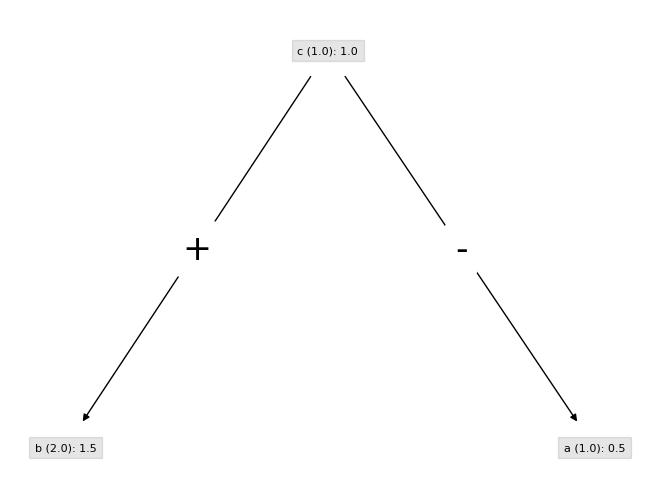

In [40]:
print("Initial QBAF:")
visualize(qbaf_initial, with_fs=True, round_to=6)

QBAF U_1:


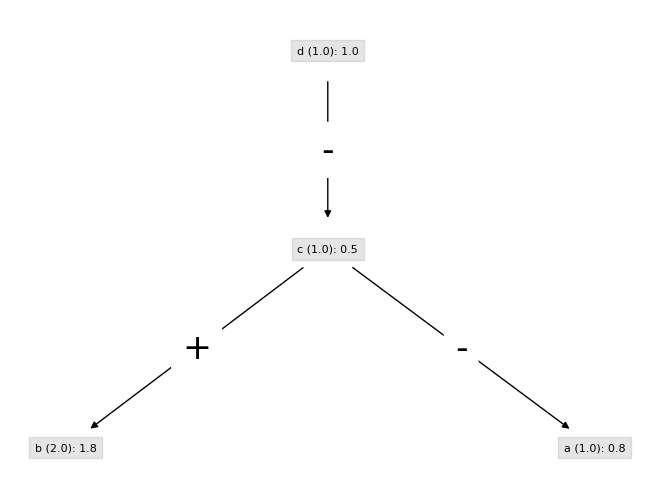

In [41]:
print("QBAF U_1:")
visualize(qbaf_u_1, with_fs=True, round_to=6)

QBAF U_2:


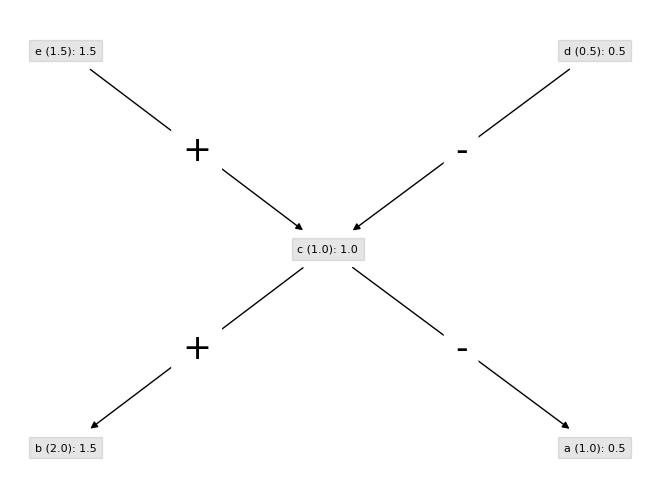

In [43]:
print("QBAF U_2:")
visualize(qbaf_u_2, with_fs=True, round_to=6)

QBAF U_3:


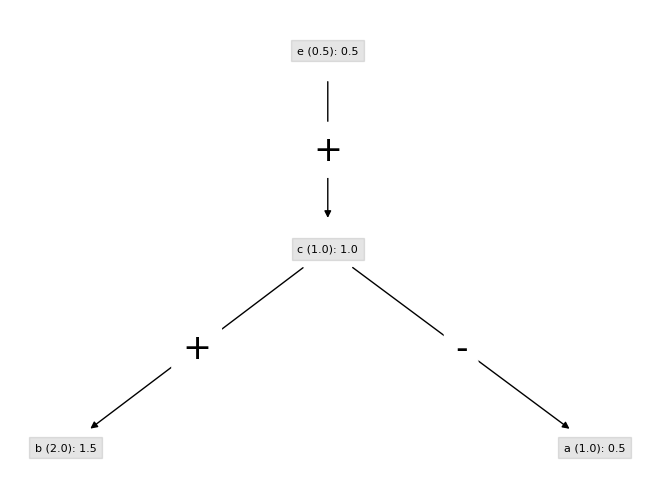

In [42]:
print("QBAF U_3:")
visualize(qbaf_u_3, with_fs=True, round_to=6)

QBAF U_4:


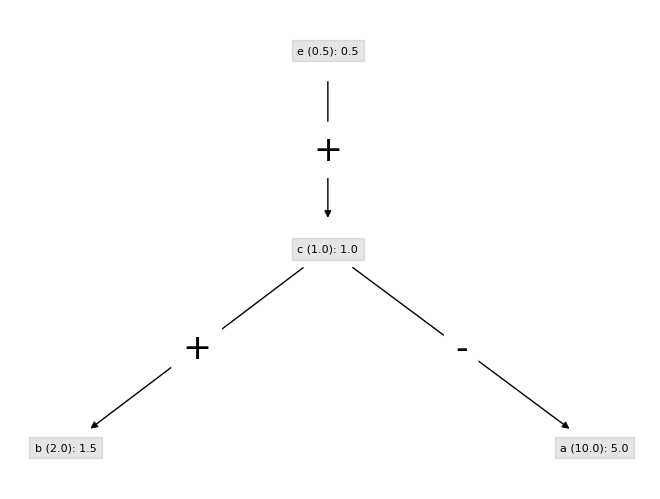

In [44]:
print("QBAF U_4:")
visualize(qbaf_u_4, with_fs=True, round_to=6)

QBAF U_5:


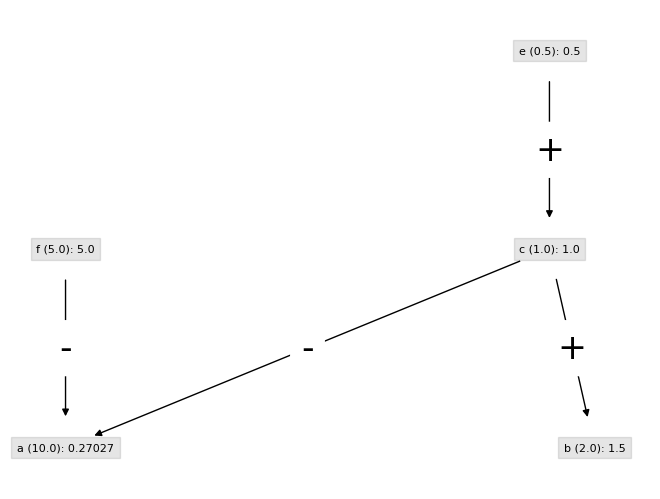

In [45]:
print("QBAF U_5:")
visualize(qbaf_u_5, with_fs=True, round_to=6)

### Robust Consistency

#### 1. General Robust Consistent

`is_general_robust_consistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff the topic arguments are strength-consistent over the collection w.r.t. the given semantics, and false otherwise.  


In [59]:
value_1 = is_general_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_1,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_general_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_2,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_3 = is_general_robust_consistent(qbaf_initial,
                                       qabf_collection_3,
                                       topic_argument_1 = 'a',
                                       topic_argument_2 = 'b')

print(f'Is qbaf_initial general robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial general robust consistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial general robust consistent over qbaf_collection_3? {value_3}')

Is qbaf_initial general robust consistent over qbaf_collection_1? True
Is qbaf_initial general robust consistent over qbaf_collection_2? True
Is qbaf_initial general robust consistent over qbaf_collection_3? False


#### 2. Expansion Robust Consistent

Similarly, `is_expansion_robust_consistent` accepts an initial QBAF, a collection and topic arguments.
As oppossed to the previous case, it only checks for strength consistency w.r.t. to expansions of the initial QBAF (within the update collection).

In [60]:
value_1 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_1,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = qbaf_collection_2,
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_3 = is_expansion_robust_consistent(qbaf_initial,
                                         qabf_collection_3,
                                         topic_argument_1 = 'a',
                                         topic_argument_2 = 'b')

print(f'Is qbaf_initial expansion robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial expansion robust consistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial expansion robust consistent over qbaf_collection_3? {value_3}')

Is qbaf_initial expansion robust consistent over qbaf_collection_1? True
Is qbaf_initial expansion robust consistent over qbaf_collection_2? True
Is qbaf_initial expansion robust consistent over qbaf_collection_3? True


#### 3. Bounded Update Robust Consistent

Lastly, `is_bounded_update_robust_consistent` accepts any QBAF, a QBAF collection, a mutable set, a permissible range of change and topic arguments.
In this case, strength consistency is checked over (initial) strength changes.

In [63]:
value_1 = is_bounded_updates_robust_consistent(qbaf_initial,
                                      qbaf_updates = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.5,
                                      mutable_args = {'d'})

value_2 = is_bounded_updates_robust_consistent(qbaf_initial,
                                      qbaf_updates = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.01,
                                      mutable_args = {'a'})

value_3 = is_bounded_updates_robust_consistent(qbaf_initial,
                                                 qabf_collection_3,
                                                 topic_argument_1= 'a',
                                                 topic_argument_2= 'b',
                                                 mutable_args= {'f'},
                                                 epsilon= 0.1)


print(f'Is qbaf_initial strength-update robust consistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial strength-update robust consistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial strength-update robust consistent over qbaf_collection_3? {value_3}')

Is qbaf_initial strength-update robust consistent over qbaf_collection_1? True
Is qbaf_initial strength-update robust consistent over qbaf_collection_2? True
Is qbaf_initial strength-update robust consistent over qbaf_collection_3? True


### Robust Inconsistency

Just like for its *consistent* counterpart, there are three inconsistency robustness notions.

#### 1. General Inconsistency Robust Inconsistent.

First, `is_general_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff whenever the topic arguments are strength-consistent over the collection w.r.t. the given semantics, and false otherwise.  


In [58]:
value_1 = is_general_robust_inconsistent(qbaf_initial,
                                        qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                        topic_argument_1 = 'a',
                                        topic_argument_2 = 'b')

value_2 = is_general_robust_inconsistent(qbaf_initial,
                                        qbaf_collection = [qbaf_initial],
                                        topic_argument_1 = 'a',
                                        topic_argument_2 = 'b')

value_3 = is_general_robust_inconsistent(qbaf_initial,
                                         qabf_collection_3,
                                         topic_argument_1 = 'a',
                                         topic_argument_2 = 'b')

print(f'Is qbaf_initial robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial robust inconsistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial robust inconsistent over qbaf_collection_3? {value_3}')

Is qbaf_initial robust inconsistent over qbaf_collection_1? False
Is qbaf_initial robust inconsistent over qbaf_collection_2? False
Is qbaf_initial robust inconsistent over qbaf_collection_3? False


#### 2. Expansion Inconsistency Robust Inconsistent.

`is_expansion_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, and topic arguments.
It returns `True` iff whenever there is a strength inconsistency for expansions, the inconsistency is preserved over expansions.
Otherwise, it returns `False`.

In [56]:
value_1 = is_expansion_robust_inconsistent(qbaf_initial,
                                      qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_2 = is_expansion_robust_consistent(qbaf_initial,
                                      qbaf_collection = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b')

value_3 = is_expansion_robust_inconsistent(qbaf_initial,
                                           qabf_collection_3,
                                           topic_argument_1= 'a',
                                           topic_argument_2= 'b')

print(f'Is qbaf_initial expansion robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial expansion robust inconsistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial expansion robust inconsistent over qbaf_collection_3? {value_3}')

Is qbaf_initial expansion robust inconsistent over qbaf_collection_1? True
Is qbaf_initial expansion robust inconsistent over qbaf_collection_2? True
Is qbaf_initial expansion robust inconsistent over qbaf_collection_3? True


#### 3. Bounded Update Robust Inconsistent.

`is_bounded_updates_robust_inconsistent` accepts an initial QBAF, along with a QBAF collection, a mutable set, a permissible range of updates and topic arguments.
It returns `True` iff whenever there is a strength inconsistency for some bounded update over the mutable set, and the inconsistency is preserved over further updates.
Otherwise, it returns `False` otherwise.

In [55]:
value_1 = is_bounded_updates_robust_inconsistent(qbaf_initial,
                                      qbaf_updates = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.01,
                                      mutable_args = {'d'})

value_2 = is_bounded_updates_robust_inconsistent(qbaf_initial,
                                      qbaf_updates = [qbaf_initial],
                                      topic_argument_1 = 'a',
                                      topic_argument_2 = 'b',
                                      epsilon = 0.1,
                                      mutable_args = {'a'})

value_3 = is_bounded_updates_robust_inconsistent(qbaf_initial,
                                                 qabf_collection_3,
                                                 topic_argument_1= 'a',
                                                 topic_argument_2= 'b',
                                                 mutable_args= {'e','f'},
                                                 epsilon= 0.1)

print(f'Is qbaf_initial bounded update robust inconsistent over qbaf_collection_1? {value_1}')
print(f'Is qbaf_initial bounded update robust inconsistent over qbaf_collection_2? {value_2}')
print(f'Is qbaf_initial bounded update robust inconsistent over qbaf_collection_3? {value_3}')

Is qbaf_initial bounded update robust inconsistent over qbaf_collection_1? True
Is qbaf_initial bounded update robust inconsistent over qbaf_collection_2? False
Is qbaf_initial bounded update robust inconsistent over qbaf_collection_3? True


### Explanations and Pockets of Consistency

#### Pockets of Consistency

The `pockets_of_consistency` function accepts any QBAF, a collection w.r.t. it and topic arguments.
It returns the $\subseteq-$maximal sets of arguments where consistency is maintained, if the updates are contained within them.

In [52]:
value_1 = pockets_of_consistency(qbaf_initial,
                                     qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_2 = pockets_of_consistency(qbaf_initial,
                                     qbaf_collection = [qbaf_initial],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_3 = pockets_of_consistency(qbaf_initial,
                                 qabf_collection_3,
                                 topic_argument_1= 'a',
                                 topic_argument_2= 'b')

print(f'The pockets of consistency for the first case:{value_1}')
print(f'The pockets of consistency for the second case:{value_2}')
print(f'The pockets of consistency for the third case:{value_3}')

The pockets of consistency for the first case:[{'d', 'e'}]
The pockets of consistency for the second case:[]
The pockets of consistency for the third case:[{'f'}]


#### Explanantions for Robustness violations

`explanation_of_robustness_violation` builds upon `pockets_of_consistency`, accepting an initial QBAF, a collection of updates and topic arguments.
It returns the minimal change required outside a maximal-pocket to bring about strength inconsistency.

In [53]:
value_1 = explanation_of_robustness_violation(qbaf_initial,
                                     qbaf_collection = [qbaf_u_1, qbaf_u_2, qbaf_u_3],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_2 = explanation_of_robustness_violation(qbaf_initial,
                                     qbaf_collection = [qbaf_initial],
                                     topic_argument_1 = 'a',
                                     topic_argument_2 = 'b')

value_3 = explanation_of_robustness_violation(qbaf_initial,
                                              qabf_collection_3,
                                              topic_argument_1= 'a',
                                              topic_argument_2= 'b')

print(f'The explanations for the first case:{value_1}')
print(f'The explanations for the second case:{value_2}')
print(f'The explanations for the third case:{value_3}')

The explanations for the first case:[({'e', 'd'}, set())]
The explanations for the second case:[]
The explanations for the third case:[({'f'}, 'e')]
